In [38]:
# importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from nltk.tokenize import word_tokenize

In [39]:
df = pd.read_csv("data/train (1).csv")

print("# ---- All Columns ---- #")
df.head()

# Checking NaN dist

df.isna().sum()

print("# ---- Text and Target Columns Only ----- #")
df.head()

# ---- All Columns ---- #
# ---- Text and Target Columns Only ----- #


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


# ---- Distribution of True/False Values ---- #


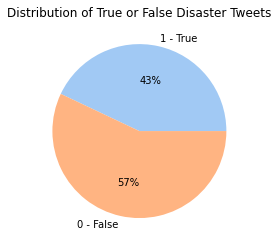

In [40]:
print("# ---- Distribution of True/False Values ---- #")

colors = sns.color_palette('pastel')[0:2]

plt.pie([sum(df['target'].values == 1), sum(df['target'].values == 0)], labels= ["1 - True", "0 - False"], colors=colors, autopct='%.0f%%', radius =1)
plt.title("Distribution of True or False Disaster Tweets")
plt.show()

         id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  
0     Our Deeds are the Reason of this #earthquake M...       1  
1                Forest fire near La Ronge Sask. Canada       1  
2     All residents asked to 'shelter in place' are ...       1  
3     13,000 people receive #wildfires evacuation or...       1  
4     Just got sent this photo from Ruby #Alaska as ...       1  
...                                                 ...     ...  
7608  Two giant cranes holding a bridge collapse int...       1  
7609  @aria_ahrary @TheTawniest The out of control w...       1  
7610  M1.94 [01:04 UT

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


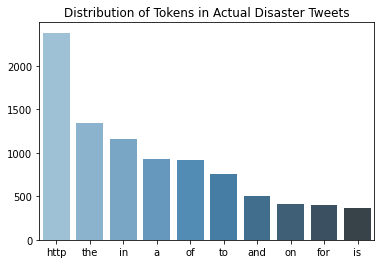

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


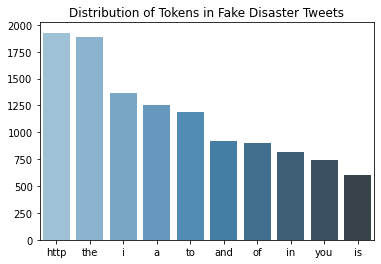

In [41]:
df_real = df[df['target'] == 1]
df_fake = df[df['target'] == 0]

print(df_real)

def create_tokens(df, type):
    new_list = list(word_tokenize(tweet.lower()) for tweet in df['text'])
    if type == 'words':
        flat = [token for sublist in new_list for token in sublist if token.isalnum()]
    else:
        flat = [token for sublist in new_list for token in sublist if not token.isalnum()]
    return flat

real_word_tokens = create_tokens(df_real, "words")
fake_word_tokens = create_tokens(df_fake, "words")

def most_popular(tokens, title):
    counts = Counter(tokens).most_common(10)
    x = [feature[0] for feature in counts]
    y = [feature[1] for feature in counts]

    sns.barplot(x, y, palette="Blues_d")
    plt.title(title)
    plt.show()

most_popular(real_word_tokens, "Distribution of Tokens in Actual Disaster Tweets")
most_popular(fake_word_tokens, 'Distribution of Tokens in Fake Disaster Tweets')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


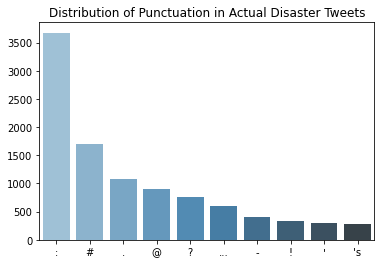

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


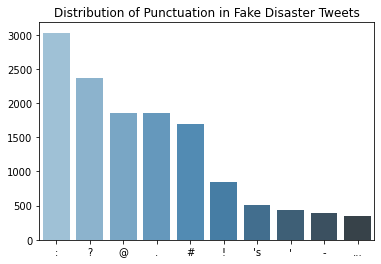

In [42]:
real_punct_tokens = create_tokens(df_real, "punct")
fake_punct_tokens = create_tokens(df_fake, "punct")

most_popular(real_punct_tokens, "Distribution of Punctuation in Actual Disaster Tweets")
most_popular(fake_punct_tokens, "Distribution of Punctuation in Fake Disaster Tweets")

In [43]:
def location_distribution(df, title):
    locations = [location for location in df['location']]
    counts = Counter(locations).most_common(10)
    data = [value[1] for value in counts]
    locations = [value[0] for value in counts]

    plt.title(title)
    plt.pie(data, labels = locations, colors = sns.color_palette('pastel')[0:10])
    plt.show()

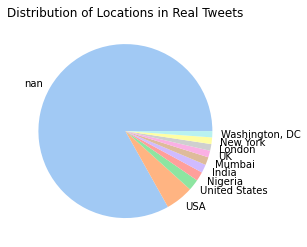

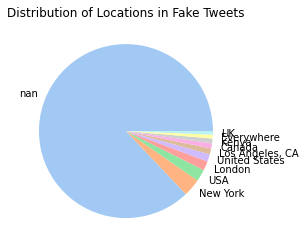

In [44]:
location_distribution(df_real, "Distribution of Locations in Real Tweets")
location_distribution(df_fake, "Distribution of Locations in Fake Tweets")

In [45]:
def keyword_distribution(df, title):
    keywords = [keyword for keyword in df['keyword']]
    counts = Counter(keywords).most_common(10)
    data = [value[1] for value in counts]
    keywords = [value[0] for value in counts]

    plt.title(title)
    plt.pie(data, labels = keywords, colors = sns.color_palette('pastel')[0:10])
    plt.show()

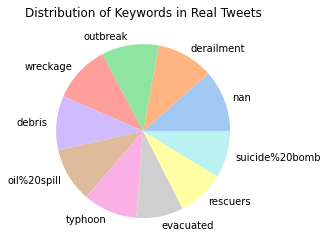

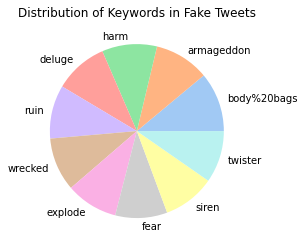

In [46]:
keyword_distribution(df_real, "Distribution of Keywords in Real Tweets")
keyword_distribution(df_fake, "Distribution of Keywords in Fake Tweets")